https://pub.towardsai.net/all-statistical-tests-using-python-mastering-statistics-part-1-996346d5add5

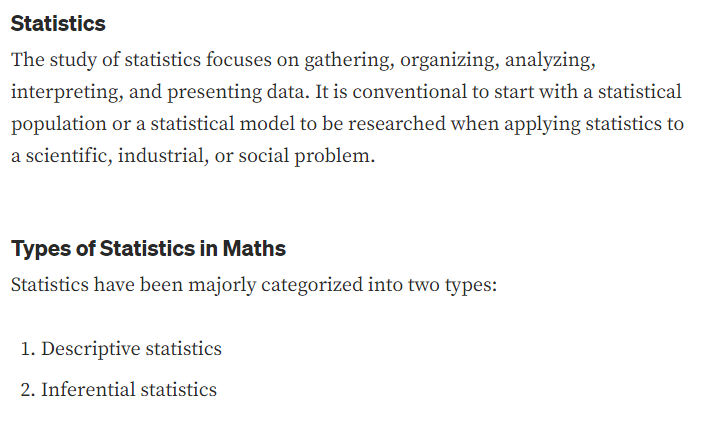

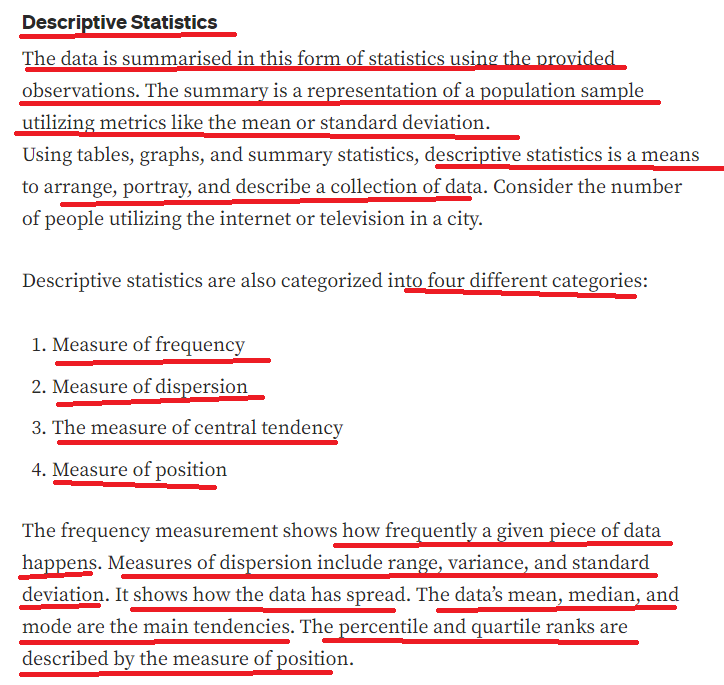

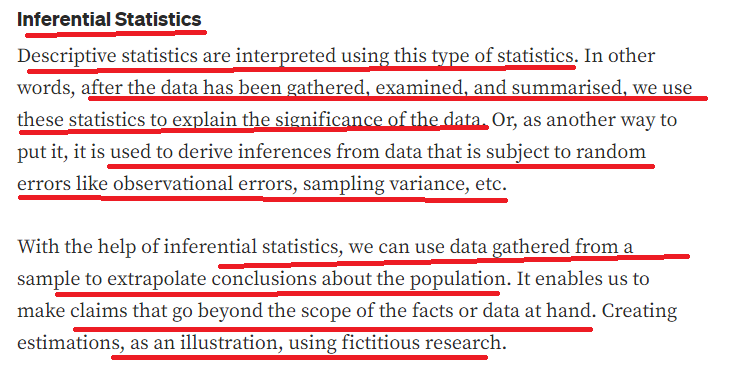

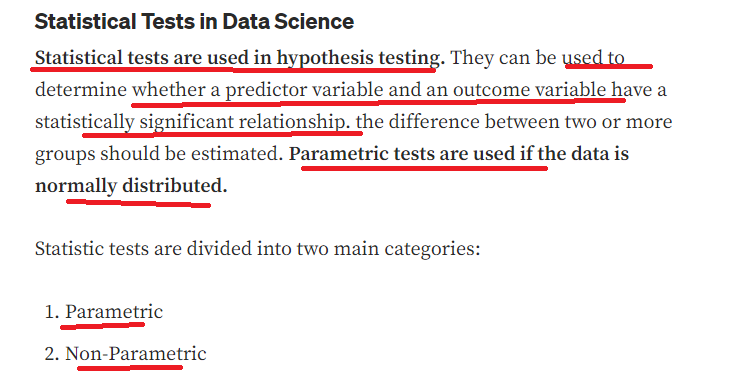

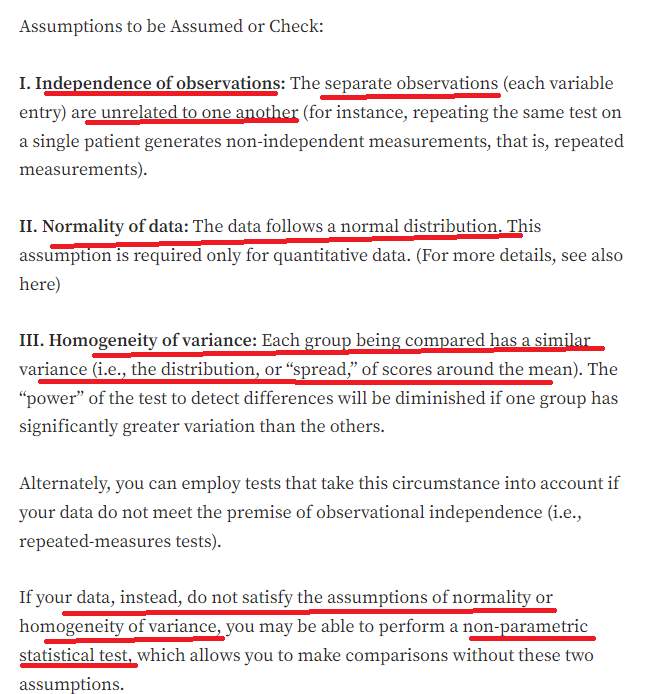

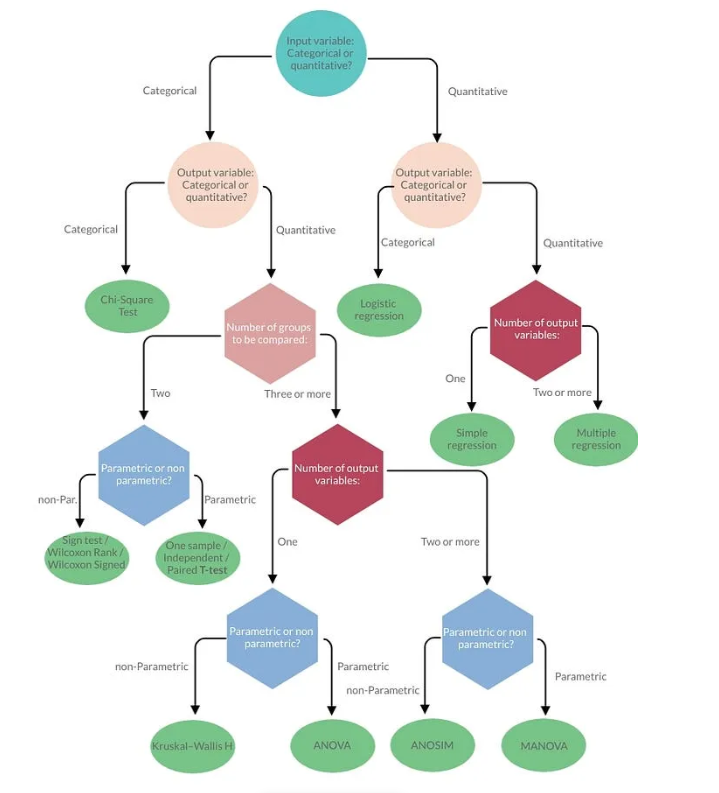

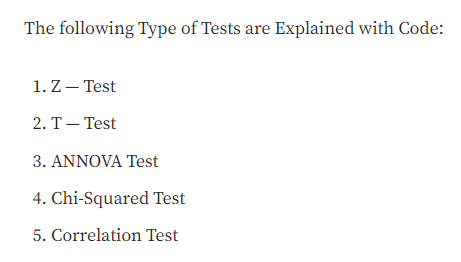

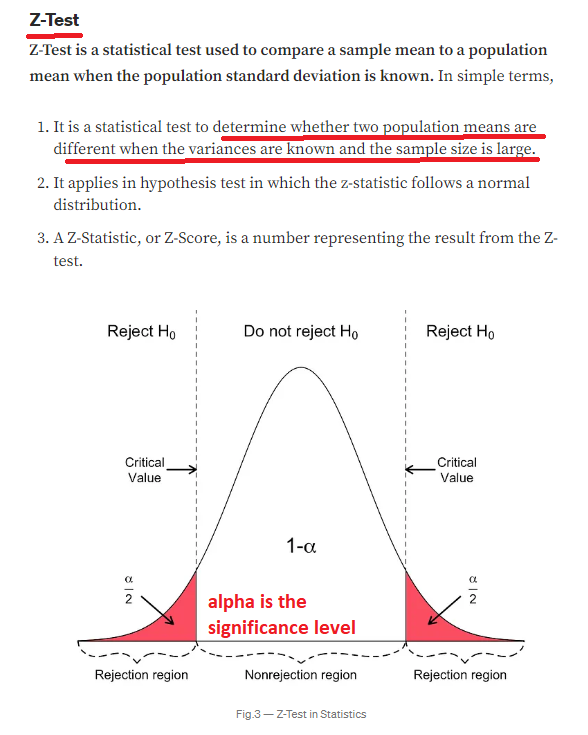

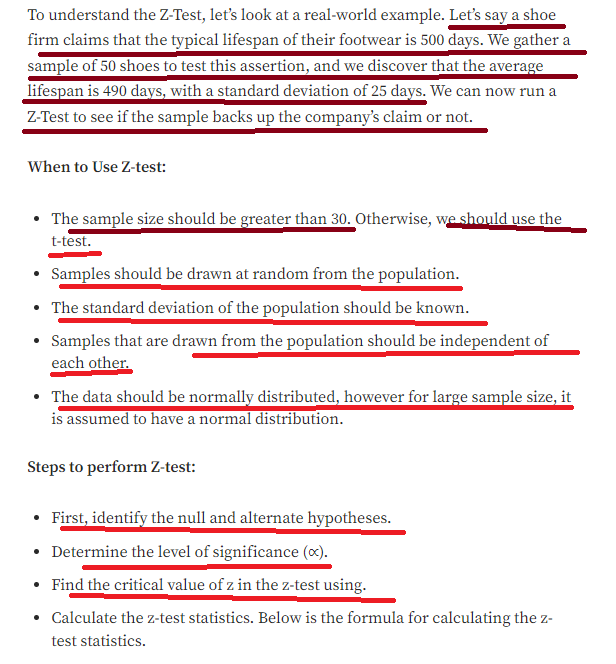

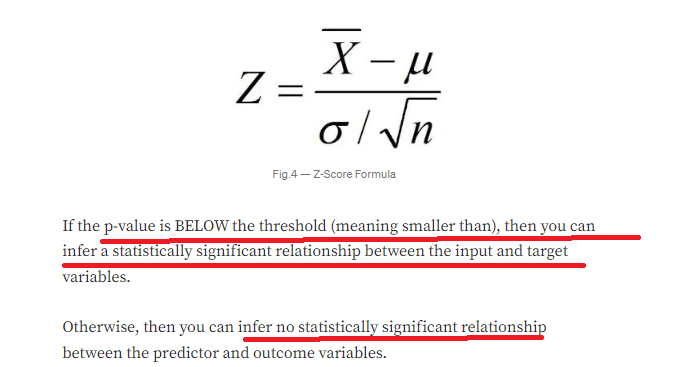

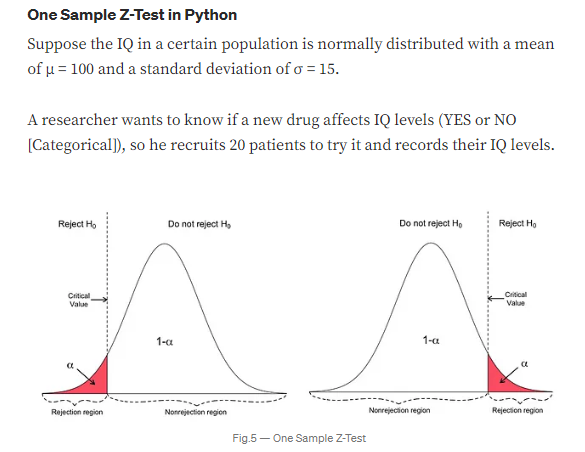

In [1]:
from statsmodels.stats.weightstats import ztest as ztest

# H0 : New Drug not Affects the IQ
# H1 : New Drug Does Affects the IQ

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest(data, value=100)

(1.5976240527147705, 0.1101266701438426)

* The test statistic for the one sample z-test is 1.5976, and the corresponding p-value is 0.1101.
* Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ levels.

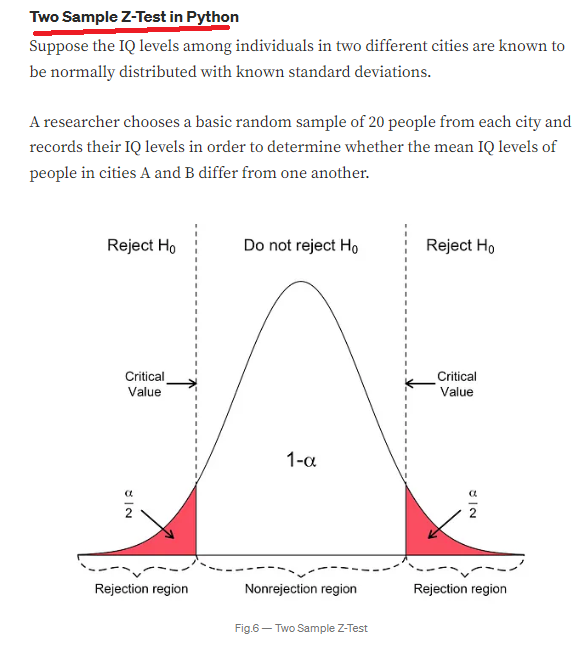

In [2]:
from statsmodels.stats.weightstats import ztest as ztest

"""
H0 : Mean is not Different
H1 : Mean is Different
"""

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0) 

(-1.9953236073282115, 0.046007596761332065)

* The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

* Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

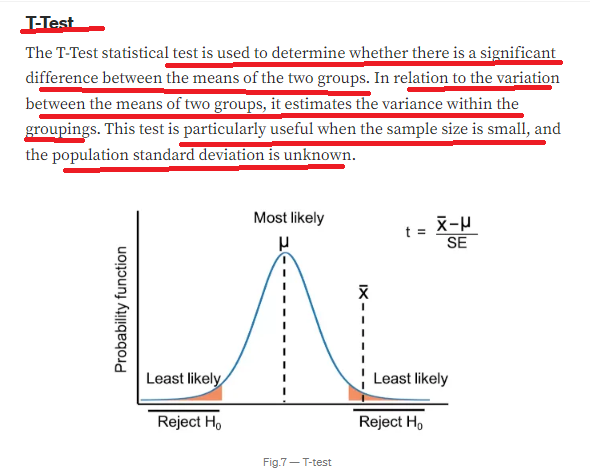

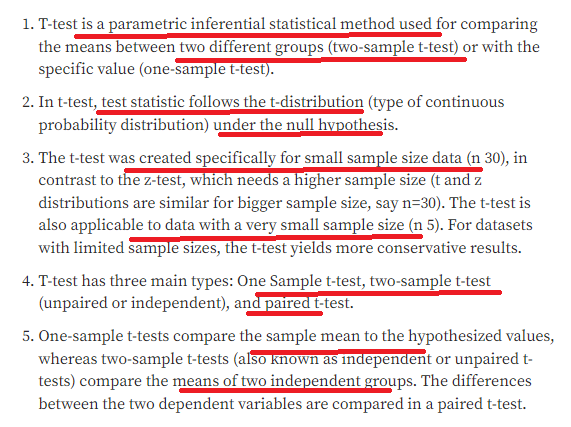

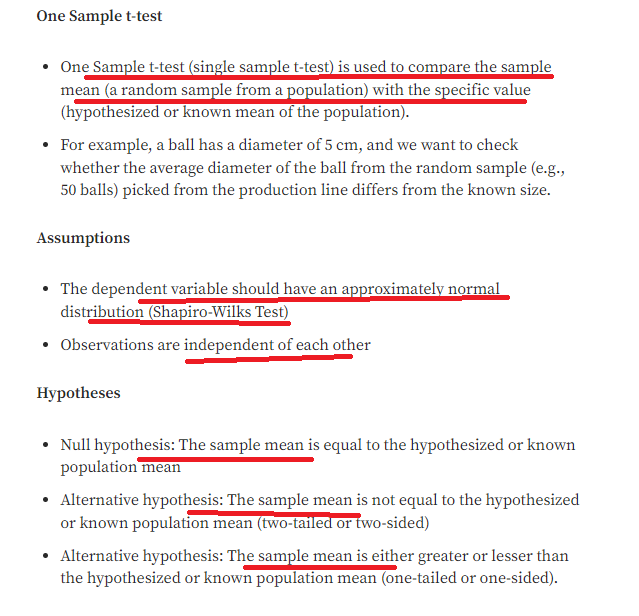

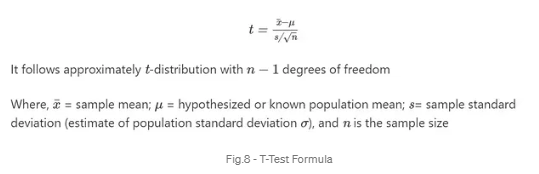

In [5]:
!pip install bioinfokit

For example, a ball has a diameter of 5 cm, and we want to check whether the average diameter of the ball from the random sample (e.g., 50 balls) picked from the production line differs from the known size.

In [6]:
from scipy import stats as st
from bioinfokit.analys import get_data

# load dataset as pandas dataframe
df = get_data('t_one_samp').data
df.head(2)


size
0  5.739987
1  5.254042

In [7]:
# t test using scipy
a =  df['size'].to_numpy()

# use parameter "alternative" for two-sided or one-sided test
st.ttest_1samp(a=a, popmean=5)

Ttest_1sampResult(statistic=0.36789006583267403, pvalue=0.714539654336473)

In [8]:
# Using only Bioinfokit
from bioinfokit.analys import stat
res = stat()
res.ttest(df=df,test_type=1, res='size',mu=5)
print(res.summary)


One Sample t-test 

------------------  --------
Sample size         50
Mean                 5.05128
t                    0.36789
Df                  49
p value (one-tail)   0.35727
p value (two-tail)   0.71454
Lower 95.0%          4.77116
Upper 95.0%          5.3314
------------------  --------


* The p-value obtained from the one sample t-test is not significant (p > 0.05), and therefore, we conclude that the average diameter of balls in a random sample is equal to 5 cm.

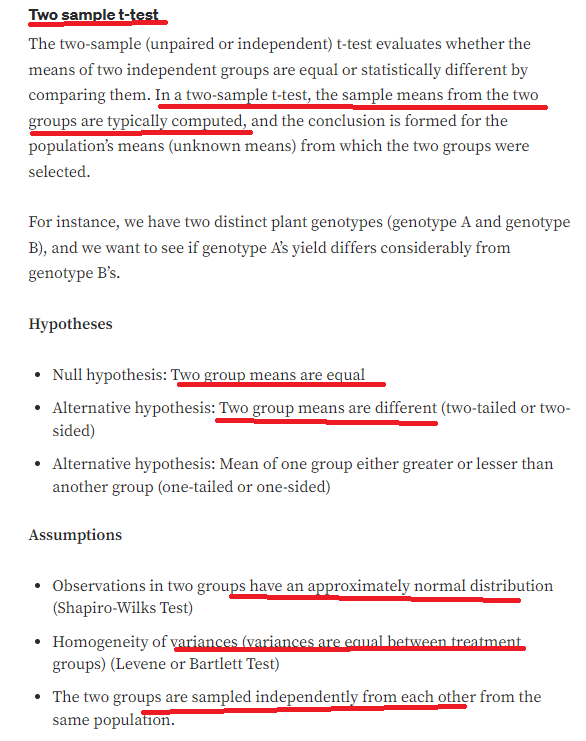

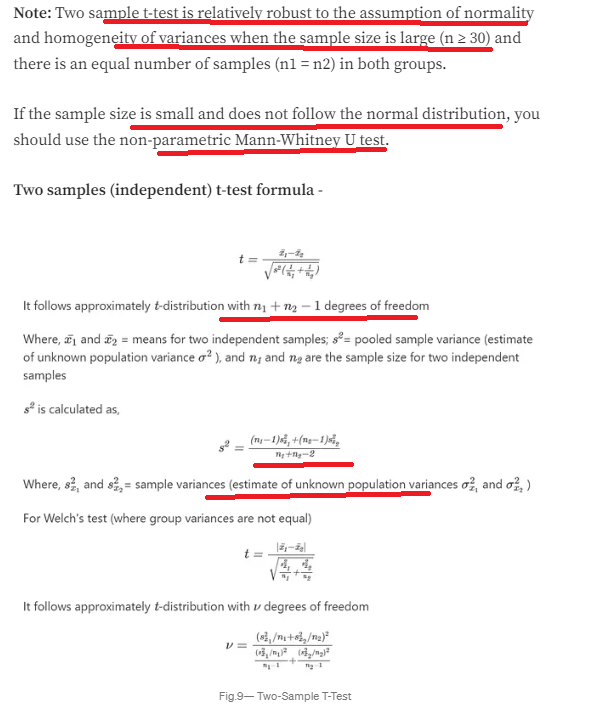

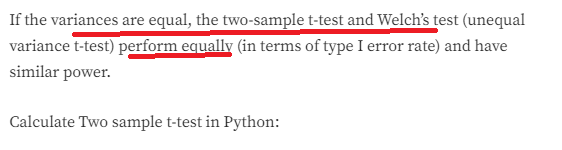

In [10]:
# perform two smaple t-test using scipy
# install bioinfokit if necessary

from scipy import stats as st
from bioinfokit.analys import get_data

# load data
df=get_data('t_ind_samp').data
df.head(2)

Genotype  yield
0        A   78.0
1        A   84.3

In [11]:
a = df.loc[df['Genotype']=="A", "yield"].to_numpy()
b = df.loc[df['Genotype']=="B", "yield"].to_numpy()

st.ttest_ind(a=a, b=b, equal_var=True)



Ttest_indResult(statistic=-5.407091104196024, pvalue=0.00029840786595462836)

In [14]:
# perform two sample t-test using bioinfokit
from bioinfokit.analys import stat
rest=stat()

# for unequal varince t-test (welchs t-test) set evar=False
res.ttest(df=df, xfac="Genotype", res="yield", test_type=2, evar=False)
print(res.summary)


Two sample t-test with unequal variance (Welch's t-test)

------------------  -------------
Mean diff           -10.3
t                    -5.40709
Std Error             1.90491
df                    9.99972
p value (one-tail)    0.000149219
p value (two-tail)    0.000298437
Lower 95.0%         -14.5444
Upper 95.0%          -6.05559
------------------  -------------

Parameter estimates

Level      Number    Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  ------  ---------  -----------  -------------  -------------
A               6    79.1    3.30817      1.35056        75.6283        82.5717
B               6    89.4    3.29059      1.34338        85.9467        92.8533



Note: Although it is possible to do a t-test when the sample sizes of the two groups are not identical, it is more effective to have an equal sample size in each group to boost the t-power. test’s

The p-value obtained from the t-test is significant (p < 0.05), and therefore, we conclude that the yield of genotype A is significantly different than genotype B.

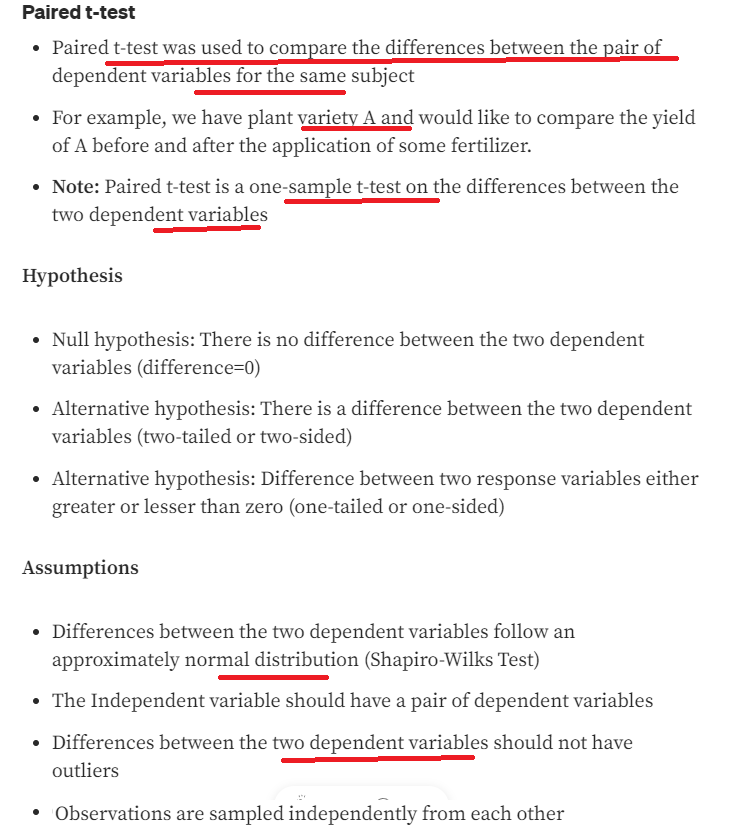

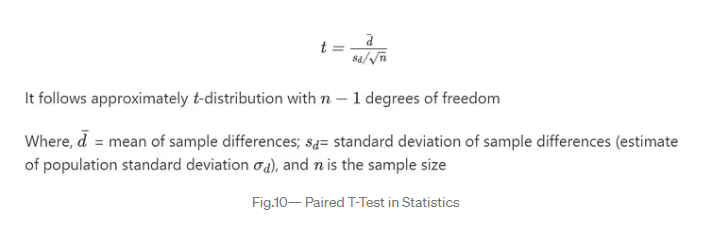

In [16]:
from bioinfokit.analys import get_data, stat

df=get_data('t_pair').data
df.head(2)

BF     AF
0  44.41  47.99
1  46.29  56.64

In [17]:
res=stat()
res.ttest(df=df, res=["AF","BF"], test_type=3)
print(res.summary)


Paired t-test 

------------------  ------------
Sample size         65
Difference Mean      5.55262
t                   14.2173
Df                  64
p value (one-tail)   8.87966e-22
p value (two-tail)   1.77593e-21
Lower 95.0%          4.7724
Upper 95.0%          6.33283
------------------  ------------


* The p-value obtained from the t-test is significant (p < 0.05), and therefore, we conclude that the yield of plant variety A significantly increased by the application of fertilizer.

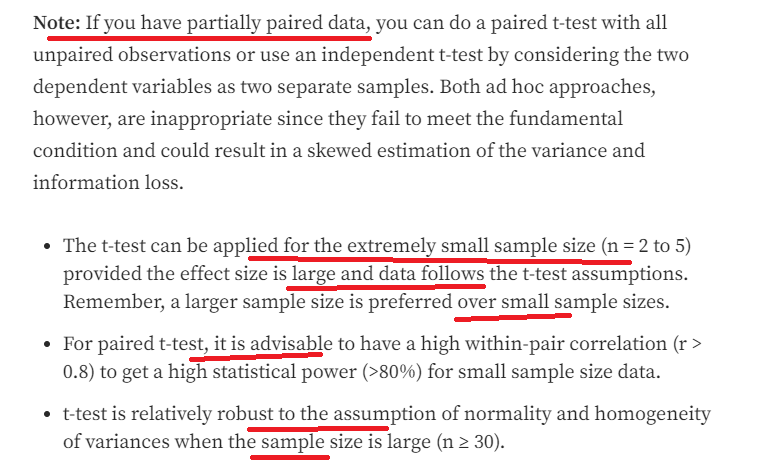

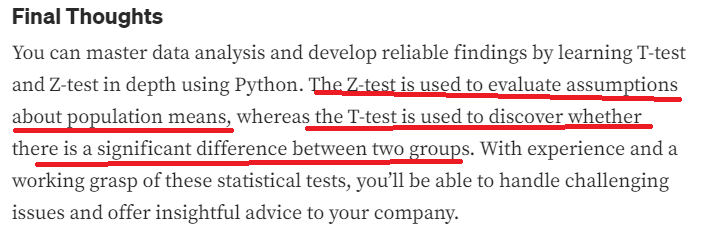

https://medium.com/@simranjeetsingh1497/the-ultimate-guide-to-statistics-part-2-inferential-statistics-54964a1d0e14

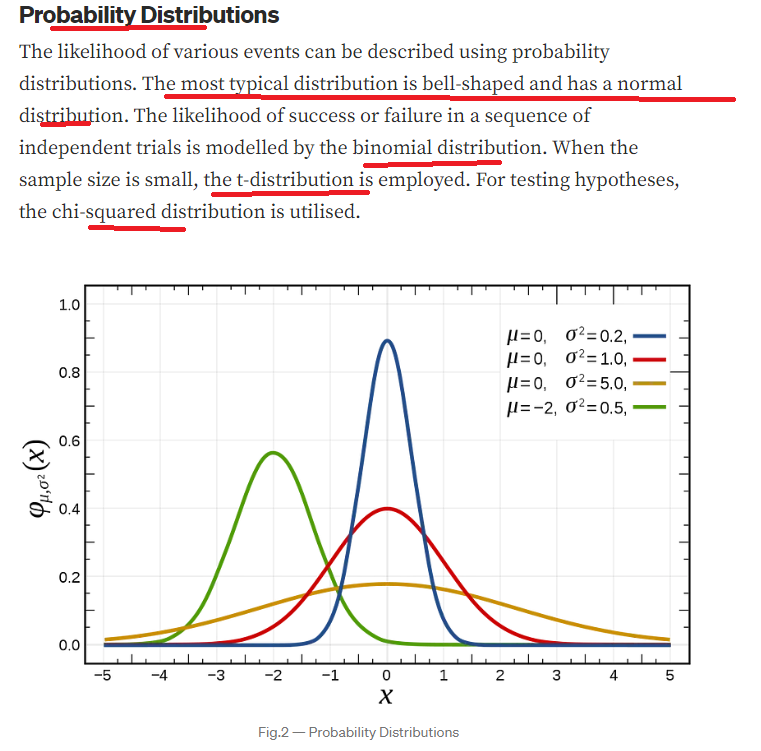

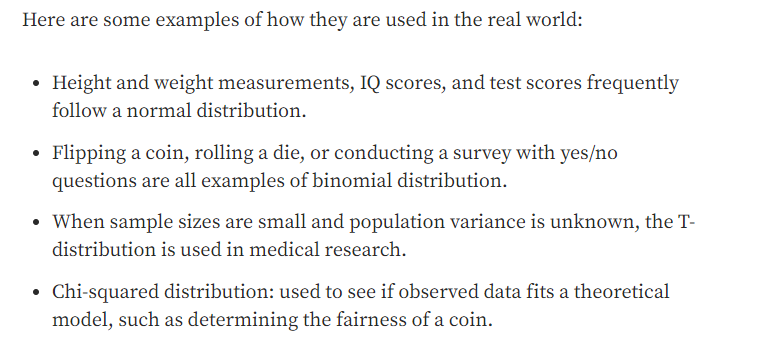

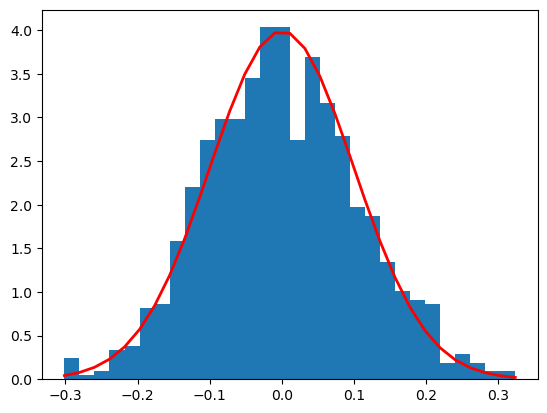

In [18]:
# Python code for generating a normal distribution
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [19]:
count

array([0.24009536, 0.04801907, 0.09603814, 0.33613351, 0.38415258,
       0.81632423, 0.8643433 , 1.58462938, 2.20887732, 2.73708712,
       2.97718248, 2.97718248, 3.4573732 , 4.03360207, 4.03360207,
       2.73708712, 3.69746856, 3.16925877, 2.78510619, 1.96878196,
       1.87274382, 1.34453402, 1.00840052, 0.91236237, 0.8643433 ,
       0.19207629, 0.28811443, 0.19207629, 0.09603814, 0.09603814])

In [20]:
bins

array([-0.30130369, -0.28047863, -0.25965357, -0.23882851, -0.21800345,
       -0.19717839, -0.17635334, -0.15552828, -0.13470322, -0.11387816,
       -0.0930531 , -0.07222804, -0.05140298, -0.03057792, -0.00975287,
        0.01107219,  0.03189725,  0.05272231,  0.07354737,  0.09437243,
        0.11519749,  0.13602255,  0.1568476 ,  0.17767266,  0.19849772,
        0.21932278,  0.24014784,  0.2609729 ,  0.28179796,  0.30262302,
        0.32344807])

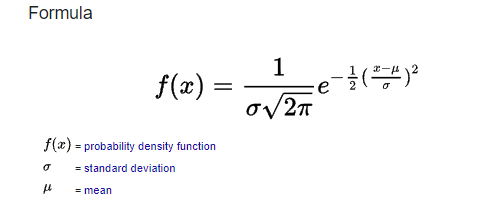

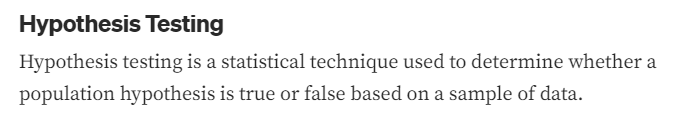

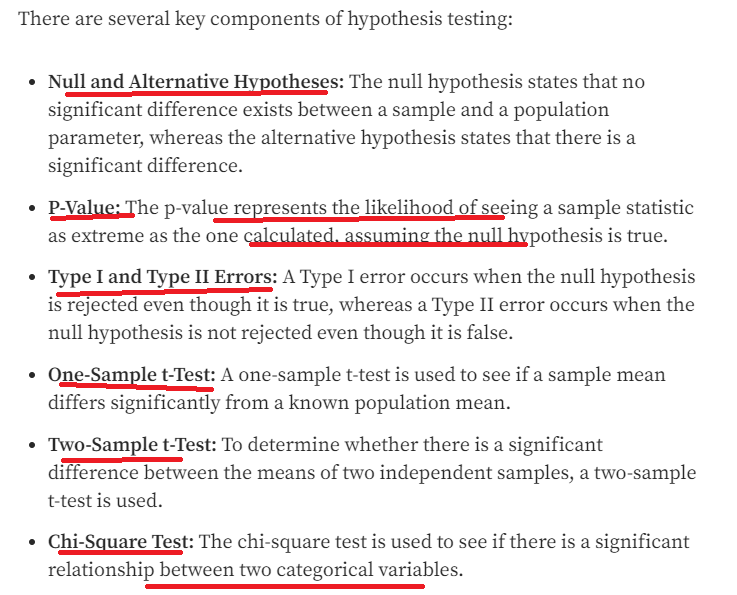

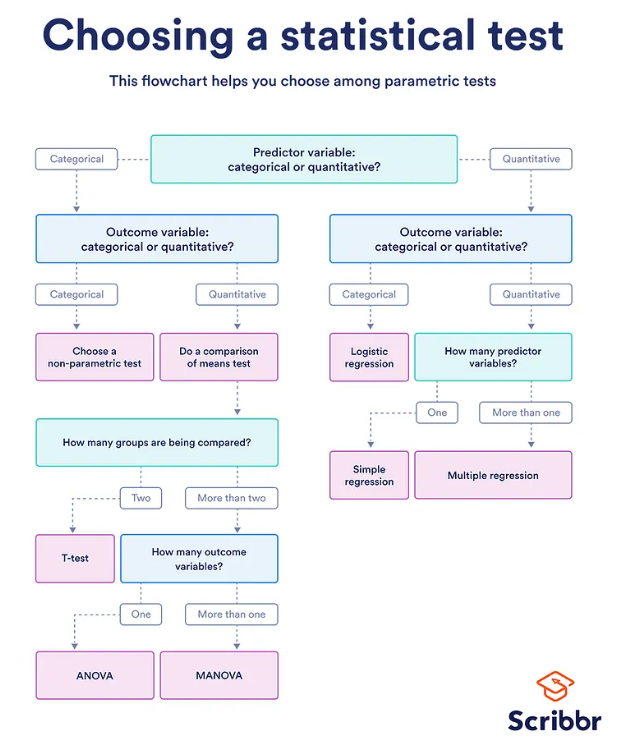

### Null and Alternative Hypotheses & P-Value:

In [21]:
# Null Hypothesis: Average height of students in a school is 5 feet
# Alternative Hypothesis: Average height of students in a school is greater than 5 feet

import numpy as np
from scipy.stats import ttest_1samp

heights = [5.1, 5.3, 5.5, 5.2, 5.7, 5.6, 5.4, 5.5, 5.3, 5.5]
mu = 5 # Population mean height
alpha = 0.05 # Significance level

t_statistic, p_value = ttest_1samp(heights, mu)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic: 6.997225525059449
p-value: 6.344142530405409e-05
Reject null hypothesis


### Type I and Type II Errors:

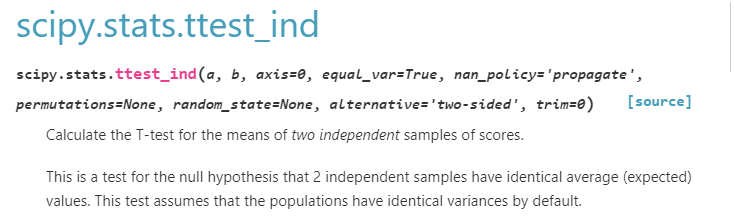

In [22]:
import numpy as np
from scipy.stats import ttest_ind

group1 = [10, 11, 13, 12, 14]
group2 = [12, 10, 15, 13, 11]
alpha = 0.05

t_statistic, p_value = ttest_ind(group1, group2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic: -0.17960530202677424
p-value: 0.8619282156106923
Fail to reject null hypothesis


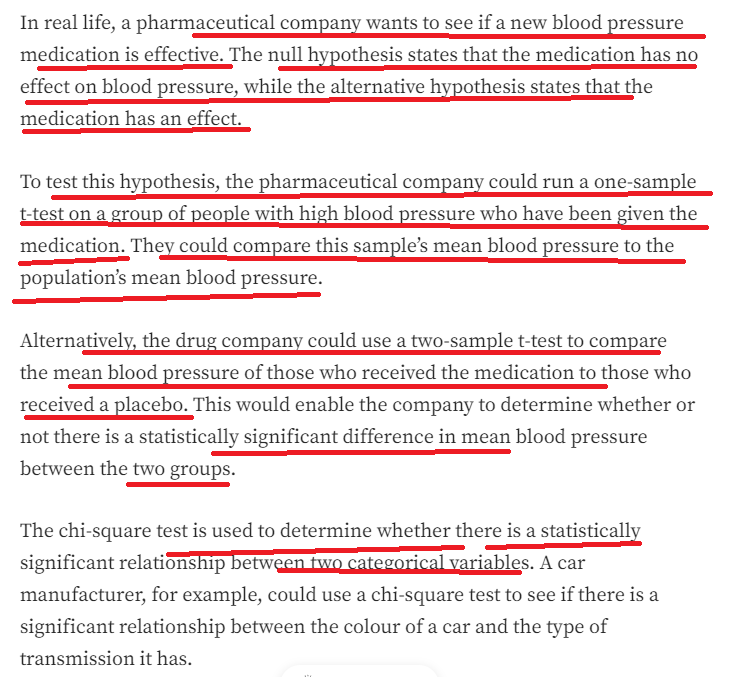

* Many statistical libraries, including SciPy and StatsModels, provide Python code examples for hypothesis testing. For example, to run a one-sample t-test in SciPy, use the following code:

In [23]:
from scipy import stats

# Sample of blood pressure measurements
bp = [130, 135, 125, 140, 128, 132, 138, 130, 136, 129]

# One-sample t-test
stats.ttest_1samp(bp, popmean=120)

Ttest_1sampResult(statistic=8.128068785597613, pvalue=1.9492773360422643e-05)

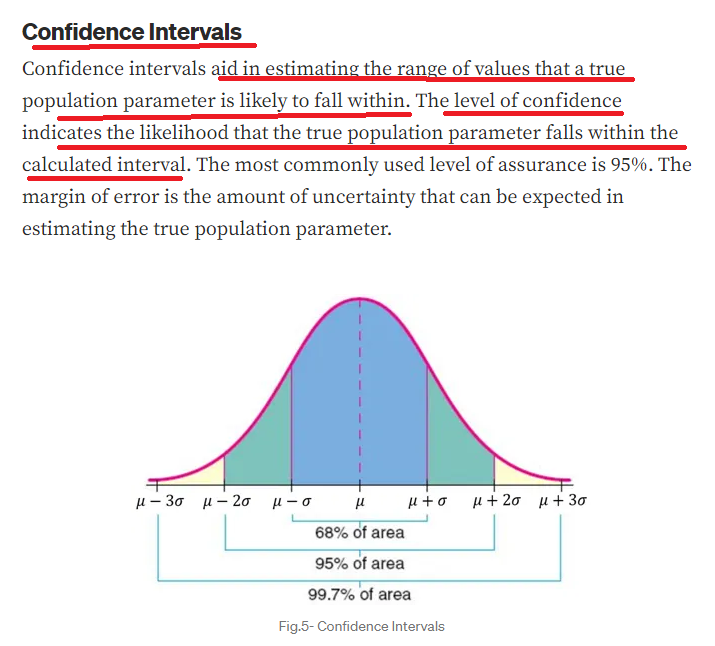

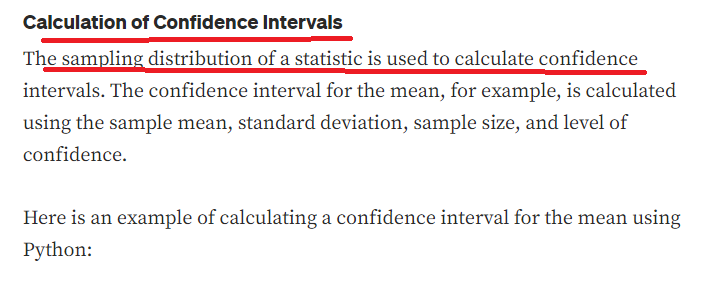

In [27]:
import numpy as np
from scipy.stats import norm

# Sample data
data = [10.2, 9.5, 8.7, 9.9, 11.1, 8.5, 10.3, 9.8]

# Sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Level of confidence
conf_level = 0.95

# Degrees of freedom
df = len(data) - 1

# Critical value
crit_val = norm.ppf((1 + conf_level) / 2)  #returns the z-score for a given conf_level
print(f"Critical value:{crit_val}")

# Margin of error
moe = crit_val * sample_std / np.sqrt(len(data))

# Confidence interval
conf_int = (sample_mean - moe, sample_mean + moe)

print("Confidence interval: ", conf_int)


Critical value:1.959963984540054
Confidence interval:  (9.159682125444172, 10.340317874555828)


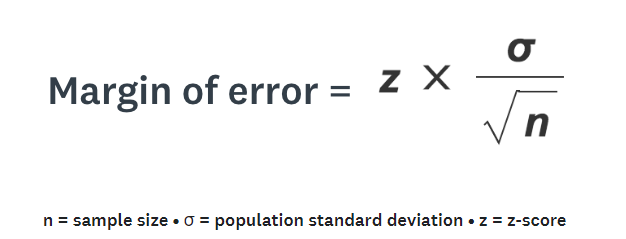

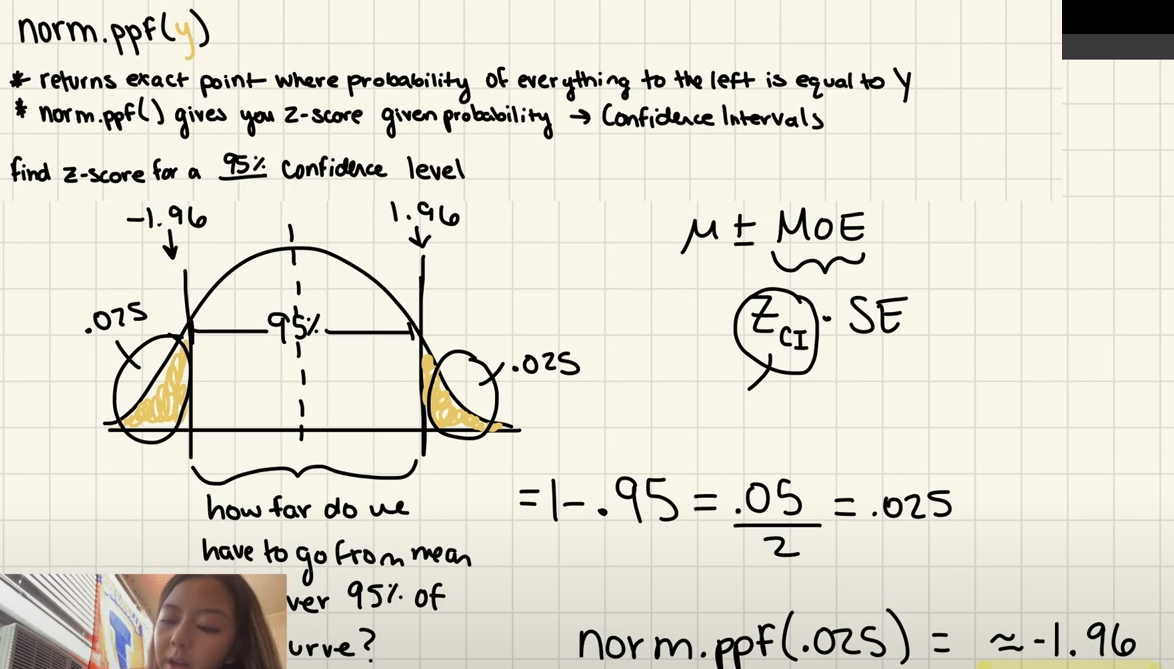

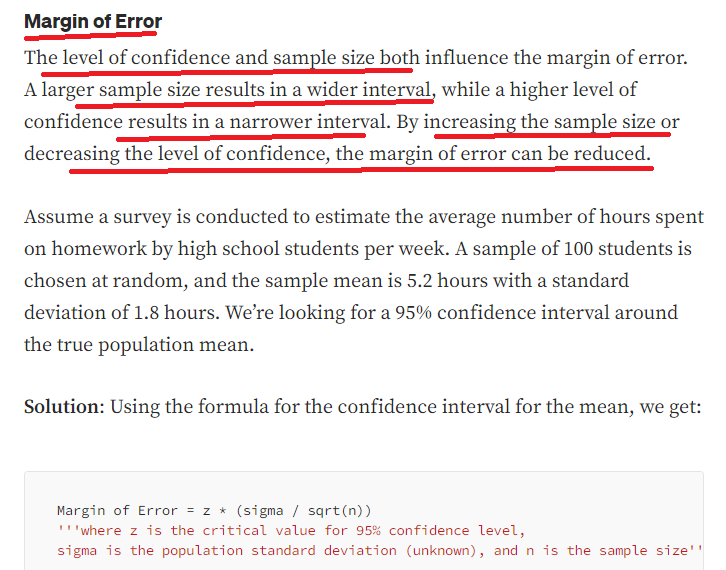

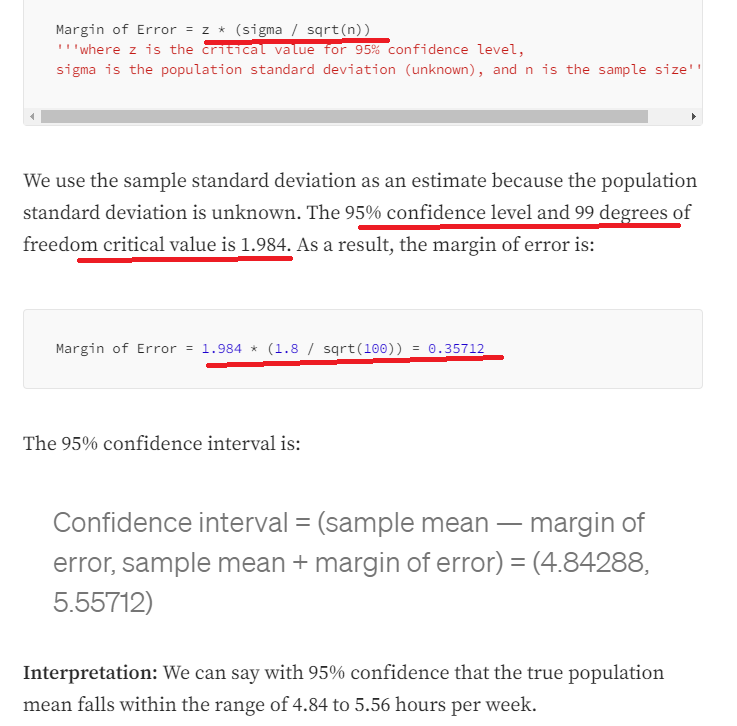

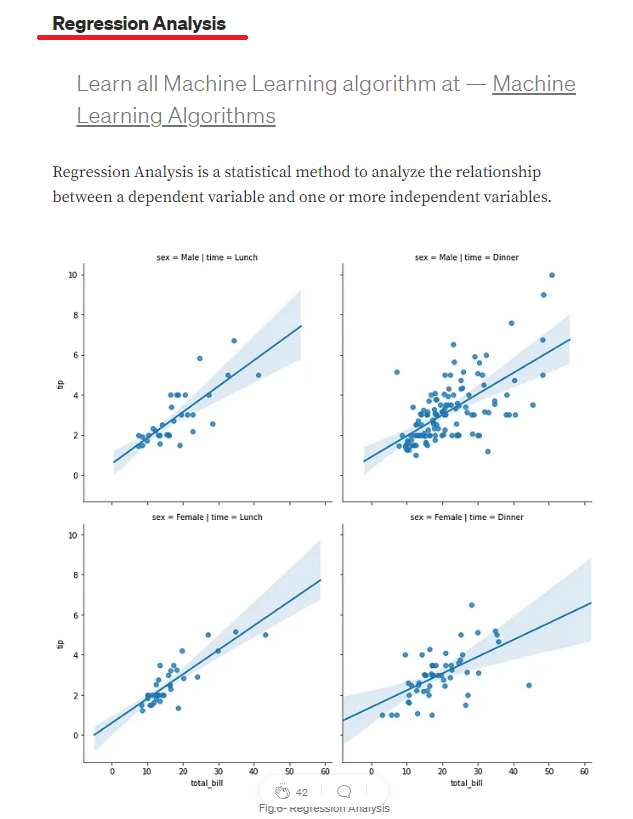

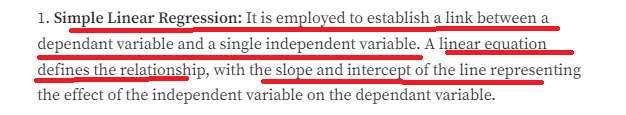

(10, 1) (10,)


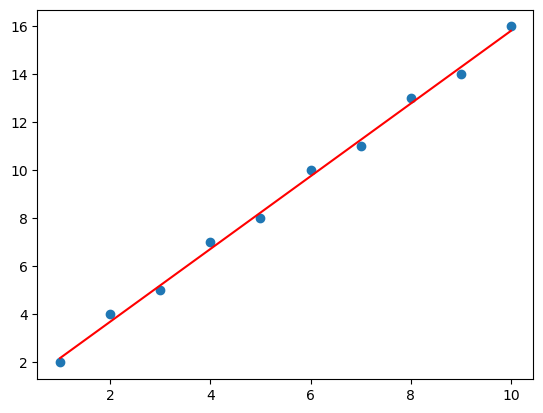

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create the dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 5, 7, 8, 10, 11, 13, 14, 16])

print(X.shape, y.shape)

# Create the linear regression model
model = LinearRegression().fit(X, y)

# Get the slope and intercept of the line
slope = model.coef_
intercept = model.intercept_

# Plot the data points and the regression line
plt.scatter(X, y)
plt.plot(X, slope*X + intercept, color='red')
plt.show()

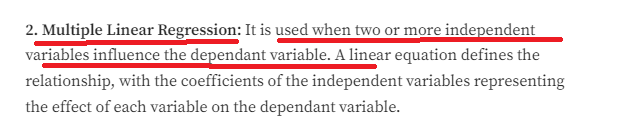

In [ ]:
# example of multiple linear logistic regression

import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('data.csv') # read data from csv file
X = data[['Independent_Var_1', 'Independent_Var_2', 'Independent_Var_3']] # select independent variables
Y = data['Dependent_Var'] # select dependent variable

# Add a constant to the independent variable set
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(Y, X).fit()

# Print model summary
print(model.summary())

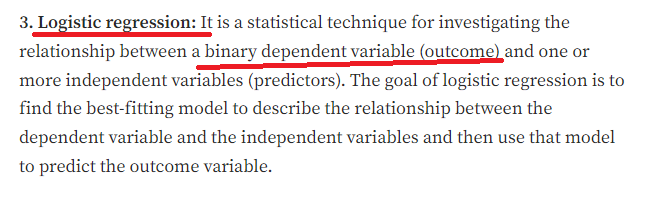

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the data
data = pd.read_csv('data.csv')

# Split the data into training and testing sets
train = data[:800]
test = data[800:]

# Define the independent variables
X_train = train[['age', 'gender', 'income']]
X_test = test[['age', 'gender', 'income']]

# Define the dependent variable
y_train = train['buy_product']
y_test = test['buy_product']

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the outcomes for the test data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy